In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette("deep")

### Business Objective

An E Commerce company or DTH (you can choose either of these two domains) provider is 
facing a lot of competition in the current market and it has become a challenge to retain the 
existing customers in the current situation. Hence, the company wants to develop a model 
through which they can do churn prediction of the accounts and provide segmented offers to the 
potential churners. In this company, account churn is a major thing because 1 account can have 
multiple customers. hence by losing one account the company might be losing more than one customer.

You have been assigned to develop a churn prediction model for this company and provide 
business recommendations on the campaign.

Your campaign suggestion should be unique and be very clear on the campaign offer because 
your recommendation will go through the revenue assurance team. If they find that you are 
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going 
to approve your recommendation. Hence be very careful while providing campaign recommendation

In [2]:
xls = pd.ExcelFile('D:/Capstone Project/Capstone Project/Customer+Churn+Data.xlsx')

In [3]:
cust_churn = pd.read_excel(xls, 'Data for DSBA')
cust_churn.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [4]:
print(f'The number of rows in the dataset are {cust_churn.shape[0]}.')
print(f'The number of columns in the dataset are {cust_churn.shape[1]}.')

The number of rows in the dataset are 11260.
The number of columns in the dataset are 19.


In [5]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

We can observe from the above table that there are seven numerical attributes and twelve categorical attributes.

In [6]:
cust_churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [7]:
print(f'The total amount of nulls present in the dataset are {cust_churn.isnull().sum().sum()}.')

The total amount of nulls present in the dataset are 2676.


In [8]:
cust_churn.Tenure.value_counts().tail(10)

99    131
26    122
#     116
25    114
29    114
31     96
50      2
60      2
51      2
61      2
Name: Tenure, dtype: int64

In [9]:
cust_churn['Tenure'] = cust_churn['Tenure'].replace('#', np.nan)

In [10]:
cust_churn.Payment.value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [11]:
cust_churn.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [12]:
cust_churn['Gender'] = cust_churn['Gender'].replace('M', 'Male')
cust_churn['Gender'] = cust_churn['Gender'].replace('F', 'Female')

In [13]:
cust_churn.Gender.value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [14]:
cust_churn['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [15]:
cust_churn['Account_user_count'] = cust_churn['Account_user_count'].replace('@', np.nan)

In [16]:
cust_churn['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [17]:
cust_churn['account_segment'] = cust_churn['account_segment'].replace('Regular +', 'Regular Plus')
cust_churn['account_segment'] = cust_churn['account_segment'].replace('Super +', 'Super Plus')

In [18]:
cust_churn['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [19]:
cust_churn['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [20]:
cust_churn['rev_per_month'].value_counts().head(10)

3     1746
2     1585
5     1337
4     1218
6     1085
7      754
+      689
8      643
9      564
10     413
Name: rev_per_month, dtype: int64

In [21]:
cust_churn['rev_per_month'] = cust_churn['rev_per_month'].replace('+', np.nan)

In [22]:
cust_churn['rev_growth_yoy'].value_counts().tail()

26    98
27    35
28    14
$      3
4      3
Name: rev_growth_yoy, dtype: int64

In [23]:
cust_churn['rev_growth_yoy'] = cust_churn['rev_growth_yoy'].replace('$', np.nan)

In [24]:
cust_churn['coupon_used_for_payment'].value_counts().tail()

15    4
16    4
#     1
$     1
*     1
Name: coupon_used_for_payment, dtype: int64

In [25]:
cust_churn['coupon_used_for_payment'] = cust_churn['coupon_used_for_payment'].replace('#', np.nan)
cust_churn['coupon_used_for_payment'] = cust_churn['coupon_used_for_payment'].replace('$', np.nan)
cust_churn['coupon_used_for_payment'] = cust_churn['coupon_used_for_payment'].replace('*', np.nan)

In [26]:
cust_churn['Day_Since_CC_connect'].value_counts().tail()

30    2
31    2
47    2
$     1
46    1
Name: Day_Since_CC_connect, dtype: int64

In [27]:
cust_churn['Day_Since_CC_connect'] = cust_churn['Day_Since_CC_connect'].replace('$', np.nan)

In [28]:
cnt = 0
for row in cust_churn['cashback']:
    try:
        float(row)
    except ValueError:
        cust_churn['cashback'].loc[cnt] = np.nan
    cnt += 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
cust_churn['cashback'] = cust_churn['cashback'].astype('float64')

In [30]:
cust_churn['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [31]:
cust_churn['Login_device'] = cust_churn['Login_device'].replace('&&&&', np.nan)

In [32]:
cust_churn['Login_device'].value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

In [33]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [34]:
print(f'The total amount of nulls present after cleaning the dataset are {cust_churn.isnull().sum().sum()}.')

The total amount of nulls present after cleaning the dataset are 4361.


In [35]:
cust_churn.size

213940

In [36]:
print(f'The null values cover {round(((cust_churn.isnull().sum().sum())/(cust_churn.size))*100, 2)}% of the data.')

The null values cover 2.04% of the data.


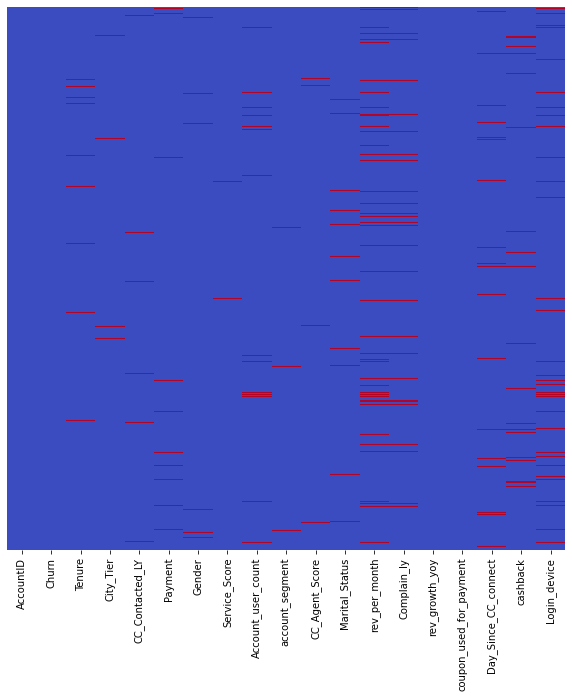

In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(cust_churn.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [37]:
cust_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.50,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,11042.0,11.025086,12.879782,0.0,2.00,9.00,16.00,99.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
Account_user_count,10816.0,3.692862,1.022976,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.00,5.00,7.00,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0


Inferences:



In [38]:
print(f'The number of duplicated rows is {cust_churn.duplicated().sum()}.')

The number of duplicated rows is 0.


Removing the 'AccountID' attribute as it is insignificant for use in the dataset.

In [39]:
cust_churn.drop('AccountID', axis=1, inplace=True)

### Countplot of Categorical Variables

In [40]:
cust_churn.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [41]:
cc_cat = cust_churn.select_dtypes(['object'])

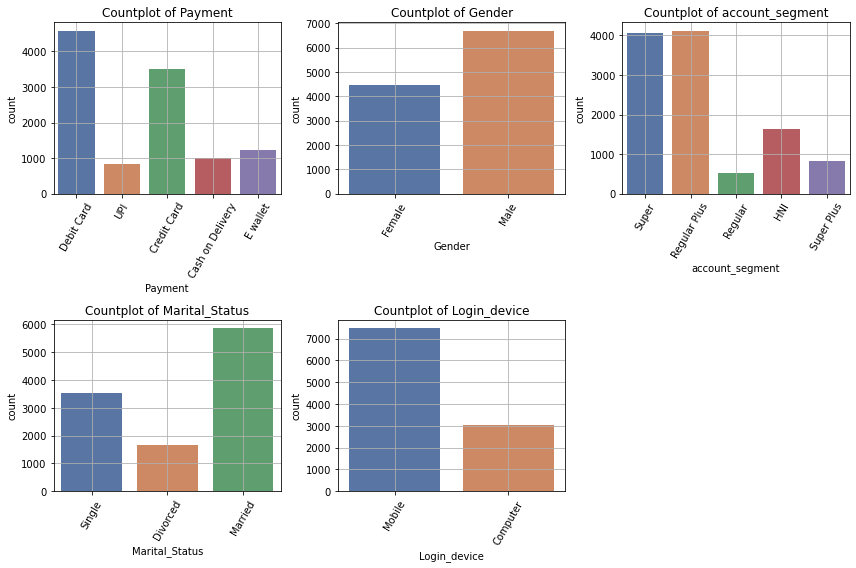

In [43]:
plt.figure(figsize=(12,8))
for i in range(len(cc_cat.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=cc_cat, x=cc_cat.columns[i])
    plt.grid(True)
    plt.xticks(rotation=60)
    plt.title(f'Countplot of {cc_cat.columns[i]}')
    plt.tight_layout()
    i+=1

### Imputing null values

In [42]:
cust_churn['Payment'] = cust_churn['Payment'].fillna(cust_churn['Payment'].mode()[0])
cust_churn['Gender'] = cust_churn['Gender'].fillna(cust_churn['Gender'].mode()[0])
cust_churn['account_segment'] = cust_churn['account_segment'].fillna(cust_churn['account_segment'].mode()[0])
cust_churn['Marital_Status'] = cust_churn['Marital_Status'].fillna(cust_churn['Marital_Status'].mode()[0])
cust_churn['Login_device'] = cust_churn['Login_device'].fillna(cust_churn['Login_device'].mode()[0])

In [43]:
for feature in cust_churn.columns:
    if cust_churn[feature].dtype == 'object':
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(cust_churn[feature].unique()))
        print(pd.Categorical(cust_churn[feature].unique()).codes)
        cust_churn[feature] = pd.Categorical(cust_churn[feature]).codes



feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus']
Categories (5, object): ['HNI', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
[3 2 1 0 4]


feature: Marital_Status
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'Married', 'Single']
[2 0 1]


feature: Login_device
['Mobile', 'Computer']
Categories (2, object): ['Computer', 'Mobile']
[1 0]


In [46]:
cust_churn.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                       int8
Gender                        int8
Service_Score              float64
Account_user_count         float64
account_segment               int8
CC_Agent_Score             float64
Marital_Status                int8
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                  int8
dtype: object

In [44]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [45]:
cust_churn_imputed = pd.DataFrame(imputer.fit_transform(cust_churn), columns = cust_churn.columns)

In [46]:
cust_churn_imputed.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

### Univariate Analysis

In [45]:
cc_num = cust_churn_imputed[['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count',
       'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 
           'Day_Since_CC_connect', 'cashback']]

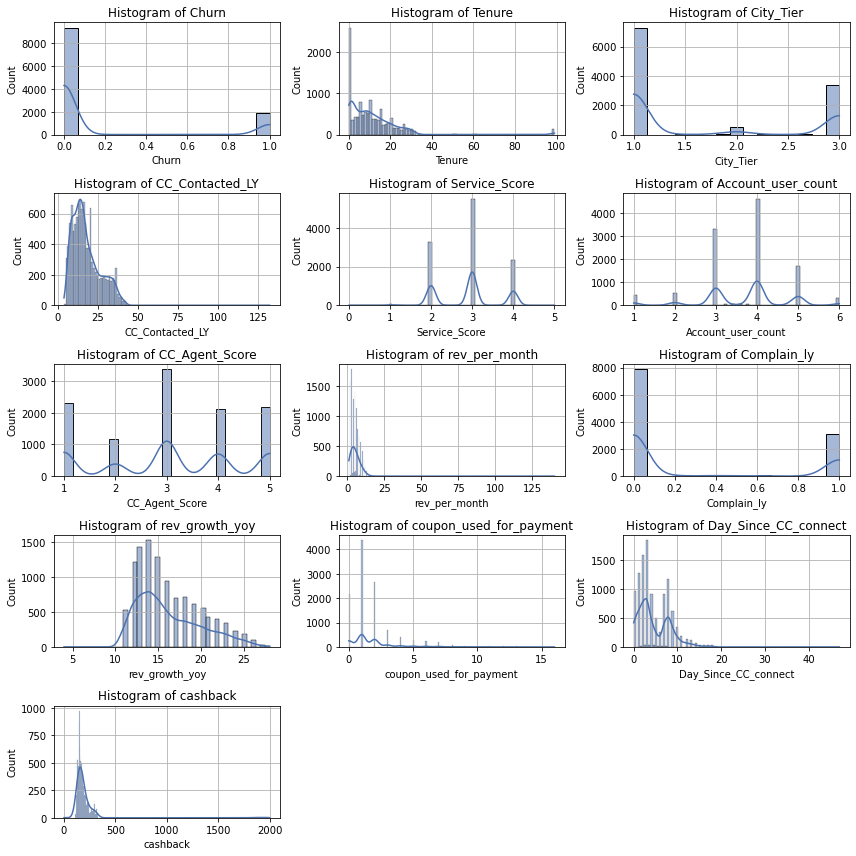

In [51]:
plt.figure(figsize=(12,12))
for i in range(len(cc_num.columns)):
    plt.subplot(5,3,i+1)
    sns.histplot(data=cc_num, x=cc_num.columns[i], kde=True)
    plt.grid(True)
    plt.title(f'Histogram of {cc_num.columns[i]}')
    plt.tight_layout()
    i+=1

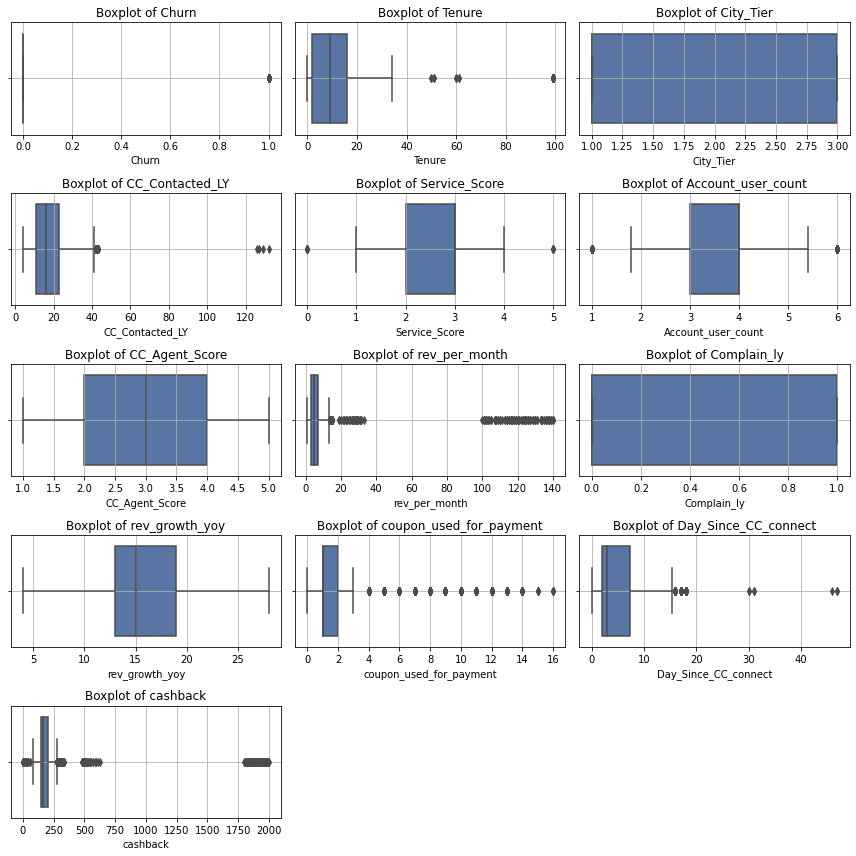

In [52]:
# HNI - High Net worth Individuals
plt.figure(figsize=(12,12))
for i in range(len(cc_num.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(data=cc_num, x=cc_num.columns[i])
    plt.grid(True)
    plt.title(f'Boxplot of {cc_num.columns[i]}')
    plt.tight_layout()
    i+=1

### Bivariate Analysis

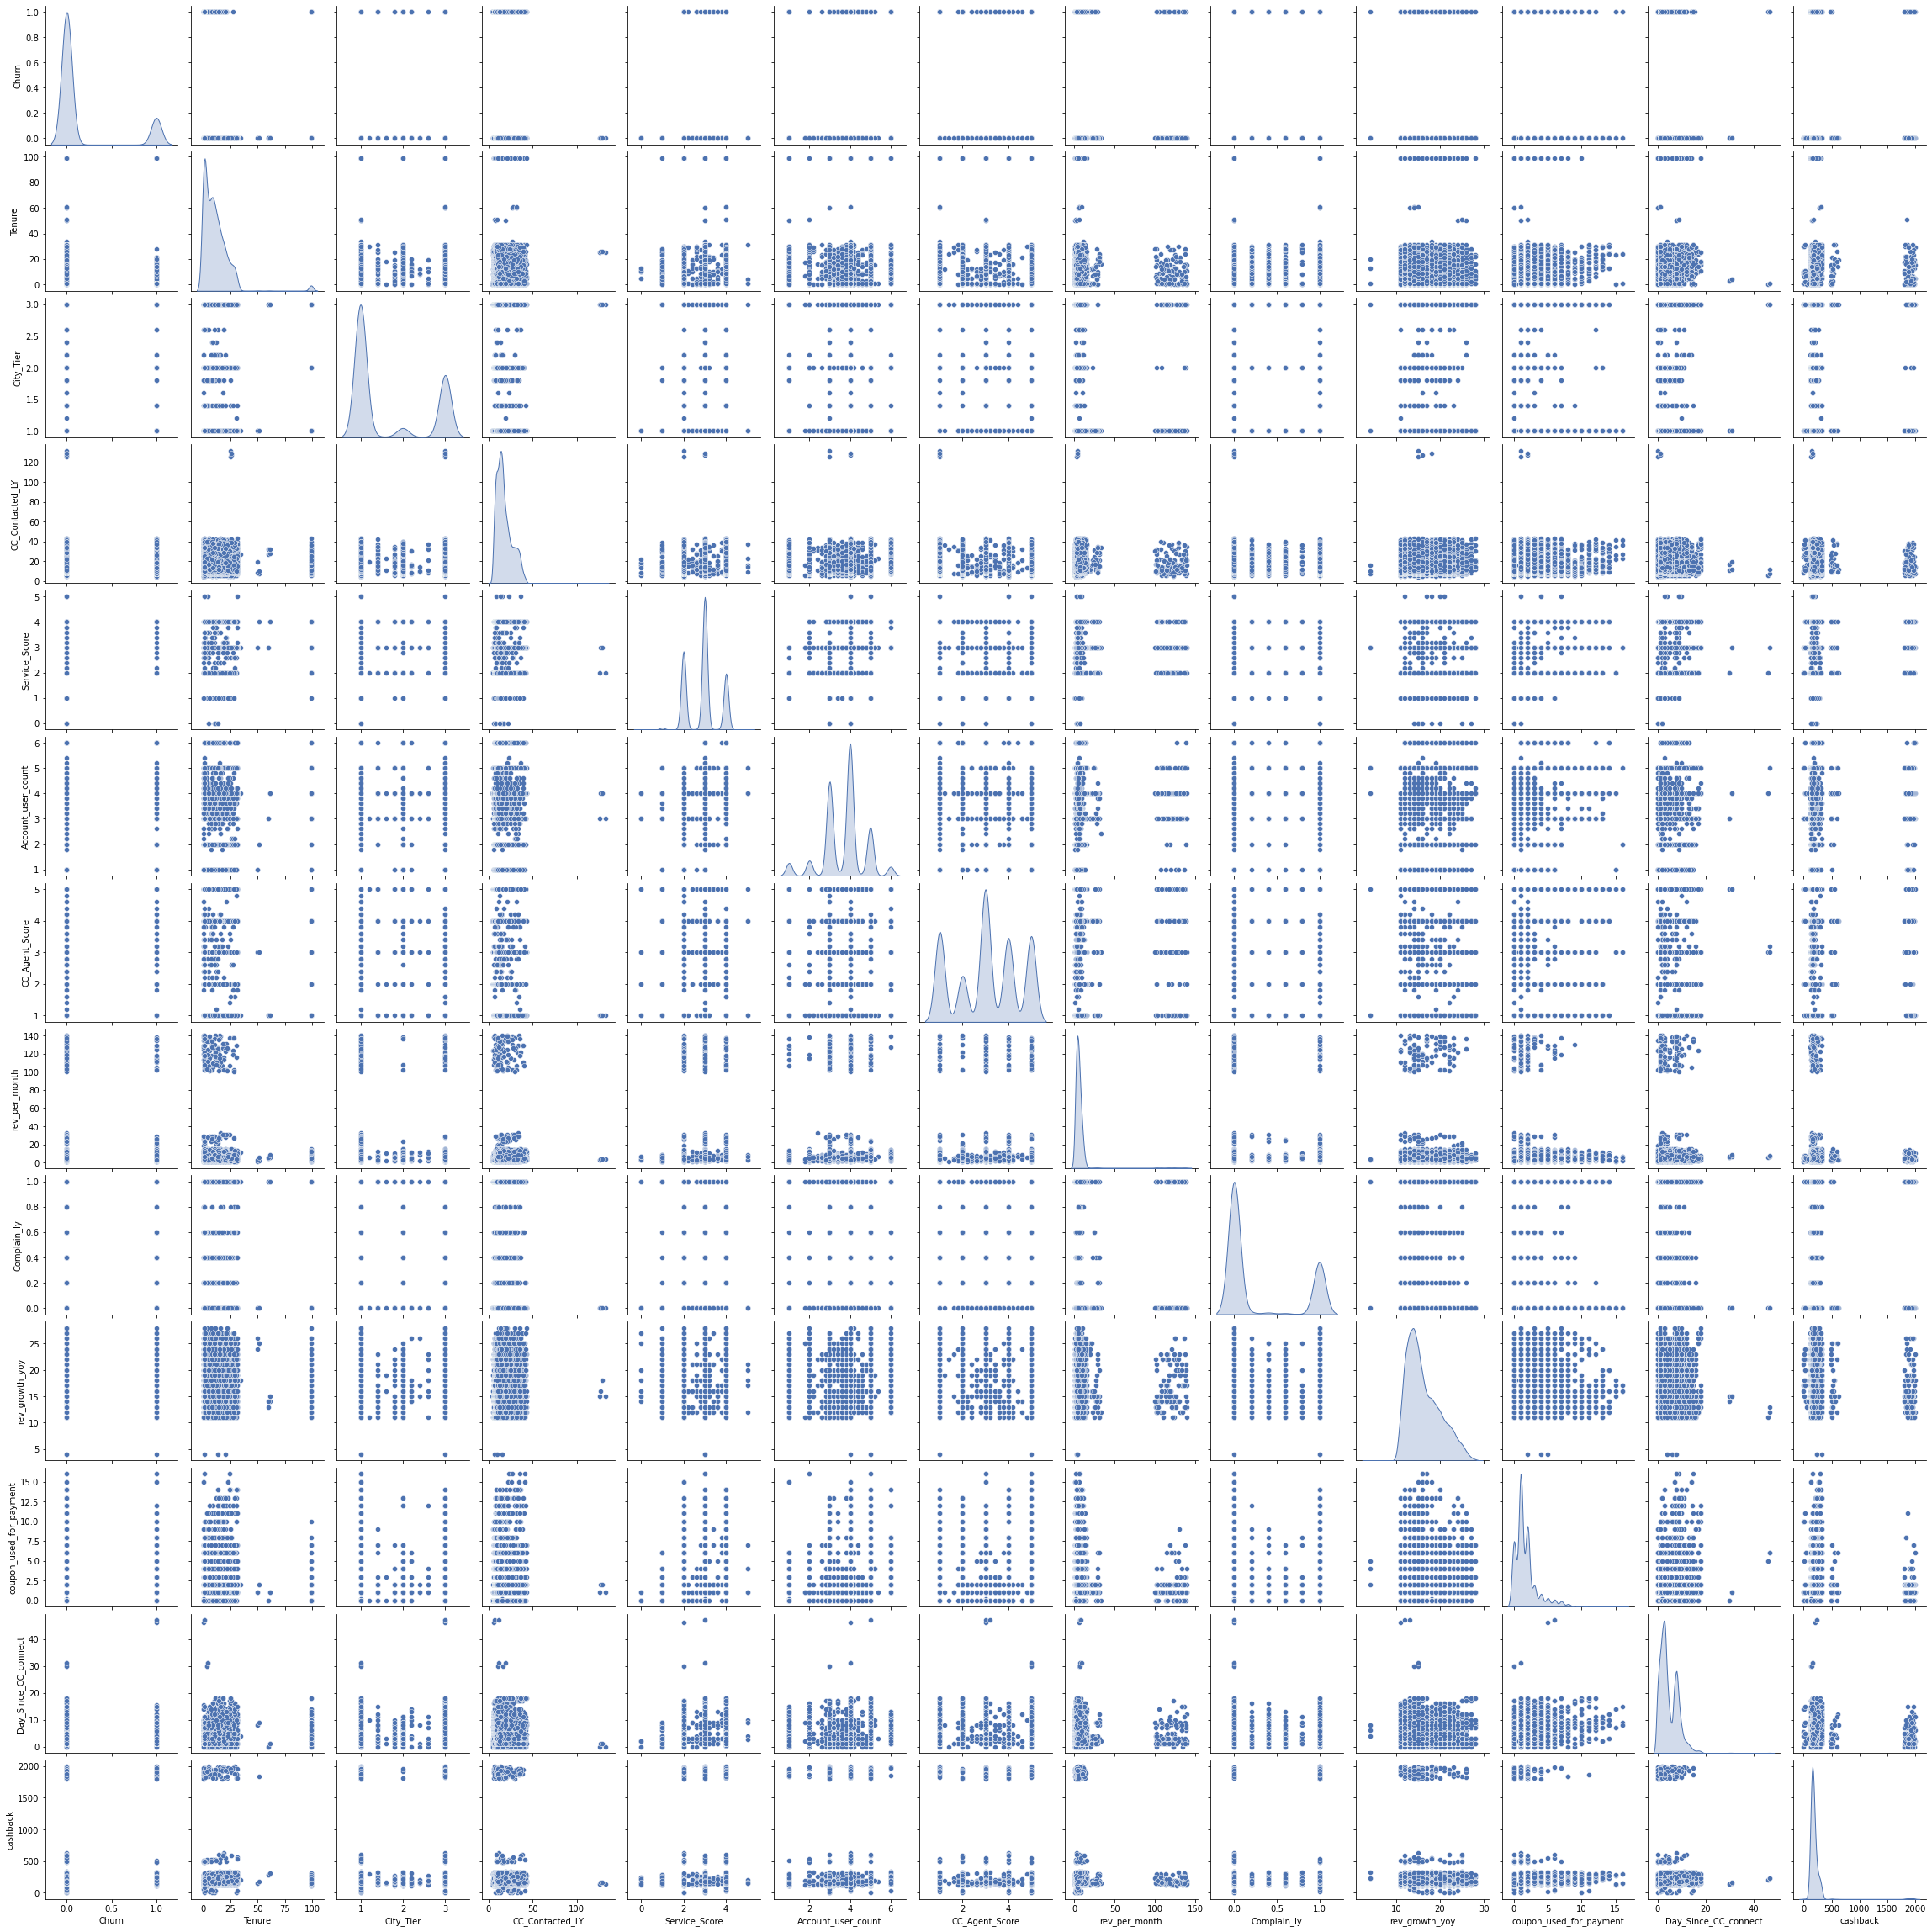

In [53]:
sns.pairplot(data=cc_num, diag_kind='kde');

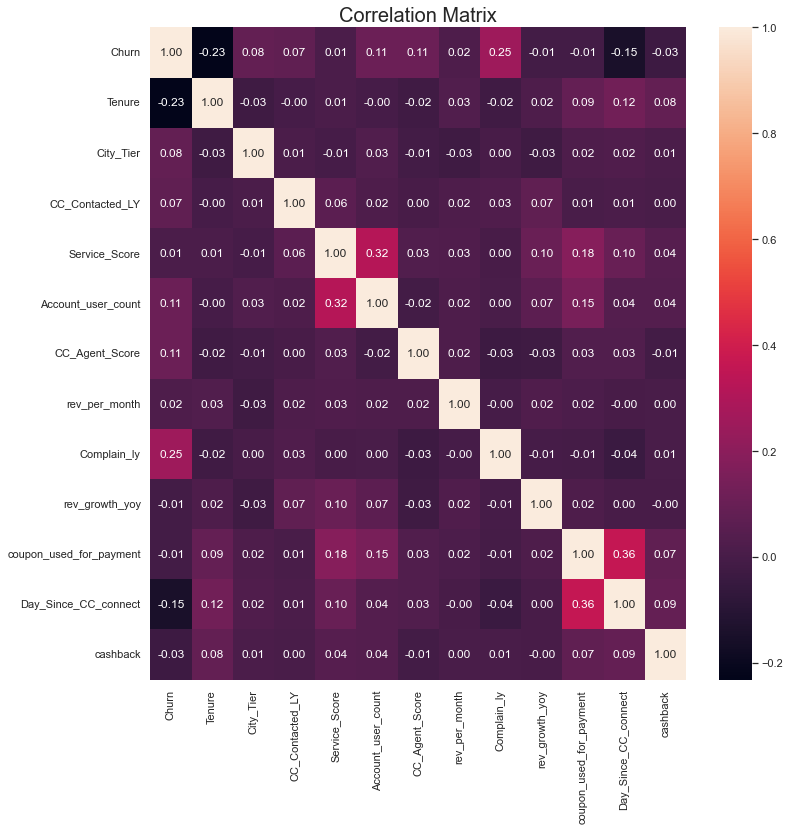

In [54]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1)
sns.heatmap(cc_num.corr(), annot=True, fmt='.2f');
plt.title('Correlation Matrix', fontsize=20)
plt.show()

(i) It seems that all of the variables have a low correlation with the target variable 'Churn'.

(ii) 'Day_Since_CC_connect' and 'Tenure' have a low inverse correlation with the target variable 'Churn' which means if value of one of these two variables increases then significantly the value of target variable 'Churn' decreases.


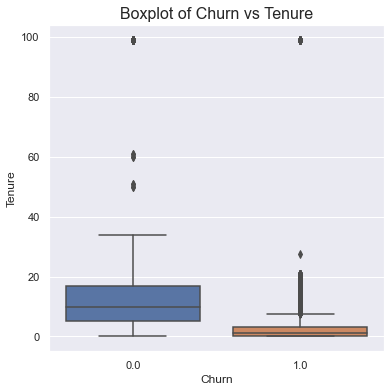

In [55]:
plt.figure(figsize=(6,6))
sns.boxplot(y=cust_churn_imputed.Tenure,x=cust_churn_imputed.Churn);
plt.title('Boxplot of Churn vs Tenure', fontsize=16)
plt.show()

### Outlier Treatment

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [48]:
lrTenure,urTenure=remove_outlier(cust_churn_imputed['Tenure'])
cust_churn_imputed['Tenure']=np.where(cust_churn_imputed['Tenure']>urTenure,urTenure,cust_churn_imputed['Tenure'])


lrCC_Contacted_LY,urCC_Contacted_LY=remove_outlier(cust_churn_imputed['CC_Contacted_LY'])
cust_churn_imputed['CC_Contacted_LY']=np.where(cust_churn_imputed['CC_Contacted_LY']>urCC_Contacted_LY,urCC_Contacted_LY,cust_churn_imputed['CC_Contacted_LY'])


lrrev_per_month,urrev_per_month=remove_outlier(cust_churn_imputed['rev_per_month'])
cust_churn_imputed['rev_per_month']=np.where(cust_churn_imputed['rev_per_month']>urrev_per_month,urrev_per_month,cust_churn_imputed['rev_per_month'])


lrcoupon_used_for_payment,urcoupon_used_for_payment=remove_outlier(cust_churn_imputed['coupon_used_for_payment'])
cust_churn_imputed['coupon_used_for_payment']=np.where(cust_churn_imputed['coupon_used_for_payment']>urcoupon_used_for_payment,urcoupon_used_for_payment,cust_churn_imputed['coupon_used_for_payment'])


lrDay_Since_CC_connect,urDay_Since_CC_connect=remove_outlier(cust_churn_imputed['Day_Since_CC_connect'])
cust_churn_imputed['Day_Since_CC_connect']=np.where(cust_churn_imputed['Day_Since_CC_connect']>urDay_Since_CC_connect,urDay_Since_CC_connect,cust_churn_imputed['Day_Since_CC_connect'])


lrcashback,urcashback=remove_outlier(cust_churn_imputed['cashback'])
cust_churn_imputed['cashback']=np.where(cust_churn_imputed['cashback']>urcashback,urcashback,cust_churn_imputed['cashback'])
cust_churn_imputed['cashback']=np.where(cust_churn_imputed['cashback']<lrcashback,lrcashback,cust_churn_imputed['cashback'])

In [49]:
selected_cols = cust_churn_imputed[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'coupon_used_for_payment', 
                    'Day_Since_CC_connect', 'cashback']]

In [53]:
selected_cols

,Tenure,CC_Contacted_LY,rev_per_month,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,4.0,6.0,9.0,1.0,5.0,159.930
1,0.0,8.0,7.0,0.0,0.0,120.900
2,0.0,30.0,6.0,0.0,3.0,141.708
3,0.0,15.0,8.0,0.0,3.0,134.070
4,0.0,12.0,3.0,1.0,3.0,129.600
...,...,...,...,...,...,...
11255,10.0,34.0,9.0,1.0,4.0,153.710
11256,13.0,19.0,7.0,1.0,8.0,226.910
11257,1.0,14.0,7.0,1.0,4.0,191.420
11258,23.0,11.0,7.0,2.0,9.0,179.900


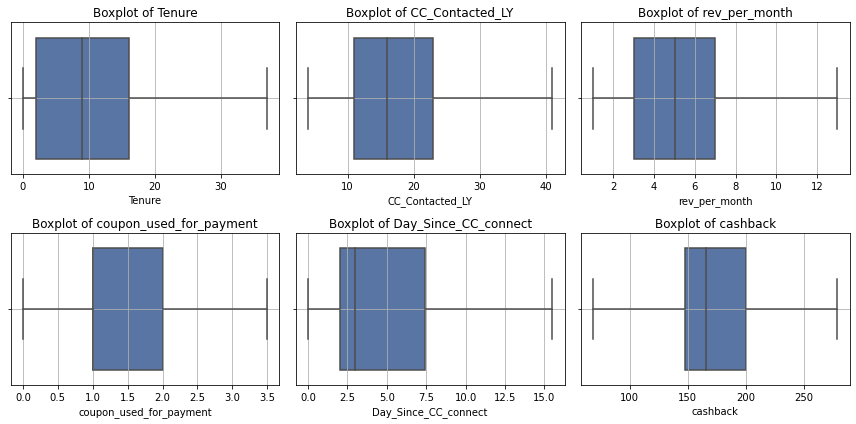

In [50]:
plt.figure(figsize=(12,6))
for i in range(len(selected_cols.columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=selected_cols, x=selected_cols.columns[i])
    plt.grid(True)
    plt.title(f'Boxplot of {selected_cols.columns[i]}')
    plt.tight_layout()
    i+=1

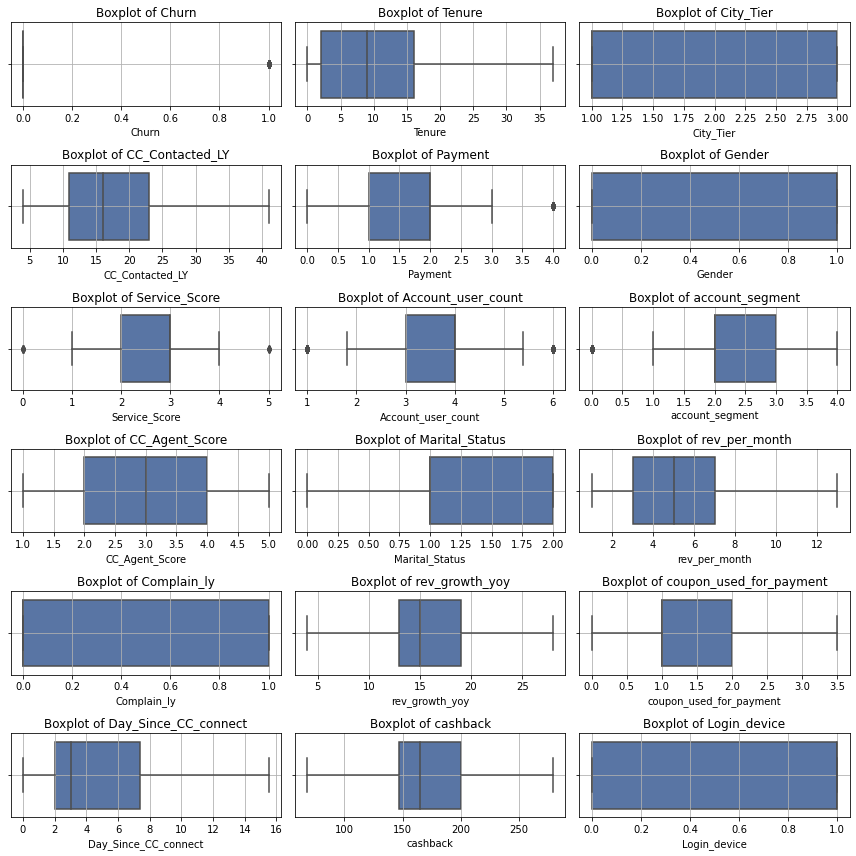

In [51]:
plt.figure(figsize=(12,12))
for i in range(len(cust_churn_imputed.columns)):
    plt.subplot(6,3,i+1)
    sns.boxplot(data=cust_churn_imputed, x=cust_churn_imputed.columns[i])
    plt.grid(True)
    plt.title(f'Boxplot of {cust_churn_imputed.columns[i]}')
    plt.tight_layout()
    i+=1

In [51]:
cust_churn_imputed['Churn'].value_counts(normalize=True)

0.0    0.831616
1.0    0.168384
Name: Churn, dtype: float64

### KNN Elbow Curve

In [52]:
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [53]:
cc_imputed_scaled = cust_churn_imputed

In [54]:
wss_value = []

for i in range(1,18):
    km = KMeans(random_state=0, n_clusters=i)
    km.fit(cc_imputed_scaled)
    wss_value.append(km.inertia_)
    i+=1

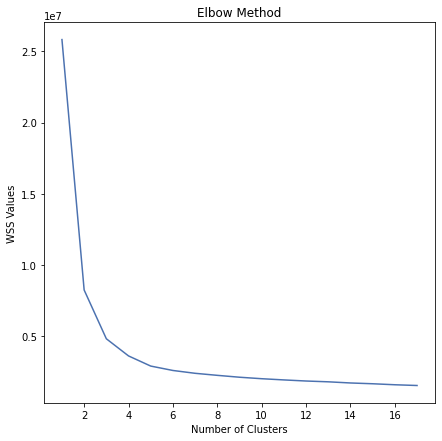

In [55]:
plt.figure(figsize=(7,7))
plt.plot(range(1,18), wss_value)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Values')
plt.title('Elbow Method')
plt.show()

Number of clusters to be chosen from the above curve is equal to 3 i.e. k=3

In [64]:
k_means = KMeans(random_state=1, n_clusters=3)
k_means.fit(cc_imputed_scaled)

KMeans(n_clusters=3, random_state=1)

In [65]:
label = k_means.labels_

In [66]:
cc_imputed_scaled['Labels'] = label

In [67]:
cc_imputed_scaled[cc_imputed_scaled['Labels']==0].describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Labels
count,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.0
mean,0.129265,10.647379,1.917725,18.508627,1.847712,0.591401,3.088821,3.882164,2.000000,3.044993,1.163939,5.565659,0.274397,16.329265,1.693343,5.358974,187.943831,0.726214,0.0
std,0.335539,8.110981,0.979235,8.708317,1.003240,0.491643,0.698119,0.968749,1.376834,1.399257,0.653283,2.911645,0.441119,3.677637,1.073692,3.324097,16.083471,0.445963,0.0
min,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.000000,164.040000,0.000000,0.0
25%,0.000000,4.000000,1.000000,12.000000,1.000000,0.000000,3.000000,3.000000,0.000000,2.000000,1.000000,3.000000,0.000000,13.000000,1.000000,3.000000,174.340000,0.000000,0.0
50%,0.000000,9.000000,1.000000,16.000000,2.000000,1.000000,3.000000,4.000000,3.000000,3.000000,1.000000,5.000000,0.000000,15.000000,2.000000,5.000000,184.680000,1.000000,0.0
75%,0.000000,15.000000,3.000000,24.000000,2.000000,1.000000,4.000000,4.000000,3.000000,4.000000,2.000000,7.000000,1.000000,19.000000,2.000000,8.000000,199.770000,1.000000,0.0
max,1.000000,37.000000,3.000000,41.000000,4.000000,1.000000,5.000000,6.000000,4.000000,5.000000,2.000000,13.000000,1.000000,28.000000,3.500000,15.500000,226.540000,1.000000,0.0


In [68]:
cc_imputed_scaled[cc_imputed_scaled['Labels']==1].describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Labels
count,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.00000,1937.000000,1937.0
mean,0.085700,18.176871,1.590604,17.793908,1.737223,0.594734,2.951162,3.800000,2.075891,3.084047,1.050077,6.082395,0.301807,16.195663,1.897780,6.487145,262.75408,0.769231,1.0
std,0.279992,8.244422,0.882997,8.869624,0.959739,0.491070,0.731571,1.005008,1.720358,1.354545,0.642078,2.913935,0.453546,3.953294,1.202348,4.290246,19.39670,0.421434,0.0
min,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,224.36000,0.000000,1.0
25%,0.000000,13.000000,1.000000,11.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,1.000000,4.000000,0.000000,13.000000,1.000000,3.000000,241.91000,1.000000,1.0
50%,0.000000,19.000000,1.000000,15.000000,2.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,15.000000,2.000000,7.000000,273.99000,1.000000,1.0
75%,0.000000,24.000000,3.000000,22.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,1.000000,8.000000,1.000000,19.000000,3.000000,10.000000,279.17500,1.000000,1.0
max,1.000000,37.000000,3.000000,41.000000,4.000000,1.000000,4.000000,6.000000,4.000000,5.000000,2.000000,13.000000,1.000000,28.000000,3.500000,15.500000,279.17500,1.000000,1.0


In [69]:
cc_imputed_scaled[cc_imputed_scaled['Labels']==2].describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Labels
count,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.0
mean,0.221056,7.315670,1.509129,17.402134,1.716684,0.616999,2.770199,3.533683,2.306576,3.075236,1.203568,4.828052,0.288562,16.106156,1.195383,3.475936,144.232184,0.722980,2.0
std,0.414995,7.890621,0.838765,8.356738,1.023173,0.486161,0.708809,1.010054,0.476778,1.366154,0.663004,2.871631,0.447118,3.737013,1.004438,2.929269,14.193986,0.447566,0.0
min,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.000000,68.255000,0.000000,2.0
25%,0.000000,1.000000,1.000000,11.000000,1.000000,0.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,0.000000,13.000000,0.000000,1.000000,132.032500,0.000000,2.0
50%,0.000000,5.000000,1.000000,15.000000,2.000000,1.000000,3.000000,4.000000,2.000000,3.000000,1.000000,4.000000,0.000000,15.000000,1.000000,3.000000,147.680000,1.000000,2.0
75%,0.000000,11.000000,2.000000,22.000000,2.000000,1.000000,3.000000,4.000000,3.000000,4.000000,2.000000,6.000000,1.000000,19.000000,2.000000,5.000000,154.730000,1.000000,2.0
max,1.000000,37.000000,3.000000,41.000000,4.000000,1.000000,5.000000,6.000000,4.000000,5.000000,2.000000,13.000000,1.000000,28.000000,3.500000,15.500000,166.940000,1.000000,2.0


In [71]:
from sklearn.metrics import silhouette_score
print(f'Hence the silhouette score is {round(silhouette_score(cc_imputed_scaled,label),4)}.')

Hence the silhouette score is 0.4443.


### 1. Model building and interpretation   

#### a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes) 

#### b. Test your predictive model against the test set using various appropriate performance metrics 
(Classification report, confusion matrix, auc-roc curve - for classification data)

#### c. Interpretation of the model(s)

### 2. Model Tuning

#### a.Ensemble modelling, wherever applicable 
(Multiple models are created to predict an outcome by using many different modelling algorithms)

#### b. Any other model tuning measures(if applicable) 
(Model tuning - Hyper parameter tuning)

#### c. Interpretation of the most optimum model and its implication on the business

80-20 percent ratio split is used for the data and a random state (=1) is introduced in train test split.
A 80/20 split is done to ensure a good accuracy of the model.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [47]:
X = cust_churn_imputed.drop('Churn', axis=1)
y = cust_churn_imputed.pop('Churn')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## CART Model

In [109]:
param_grid1 = {
    'max_depth': [8,9],
    'min_samples_leaf': [10,15],
    'min_samples_split': [30,45],
    'max_features': [9]
}

max depth- It is the number of nodes along the longest path from the root node down to the farthest leaf node. 

minimum sample leaf- It is the minimum number of samples required to be at a leaf node. It is usually selected at 1-3 percent of all records

minimum sample split- It is the minimum number of samples required to split an internal node. It is chosen to be usually three times of the chosen value of minimum sample leaf.

max features- It is usually a restriction given on high number of features to improve accuracy of the model. It is a hyper parameter which is usually chosen around half the number of available features.

In [110]:
dt_model = DecisionTreeClassifier()

In [111]:
grid_search1 = GridSearchCV(estimator=dt_model, param_grid=param_grid1, cv=3)

'cv' is nothing but an internal cross validation technique which is used to calculate the score for each combination of parameters in the grid. Here in this case cv is equal to 3.

In [112]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9], 'max_features': [9],
                         'min_samples_leaf': [10, 15],
                         'min_samples_split': [30, 45]})

In [113]:
grid_search1.best_params_

{'max_depth': 9,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 45}

In [114]:
best_grid1 = grid_search1.best_estimator_

In [115]:
ytrain_predict = best_grid1.predict(X_train)
ytest_predict = best_grid1.predict(X_test)

In [116]:
print(f'The accuracy score of the CART model (Train) is {round(grid_search1.score(X_train, y_train),5)}')

The accuracy score of the CART model (Train) is 0.91907


In [117]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      7484
         1.0       0.79      0.72      0.75      1524

    accuracy                           0.92      9008
   macro avg       0.86      0.84      0.85      9008
weighted avg       0.92      0.92      0.92      9008



The bigger and most important problem that will be faced by the company is, when the model predicts that the customer is not at the verge of churning but actually he is at the verge of churning. That's when we are going to lose a precious customer. Such errors are called Type-2 error or also called as False Negatives. Such errors are determined by the recall score of the model. Hence recall scores have a high significance for this dataset. 

In [65]:
from sklearn import metrics

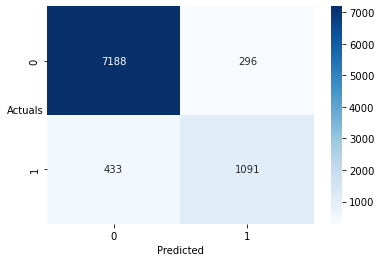

In [119]:
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [120]:
ytrain_predict1 = best_grid1.predict_proba(X_train)
ytest_predict1 = best_grid1.predict_proba(X_test)

In [121]:
probs1 = ytrain_predict1[:,1]
probs2 = ytest_predict1[:,1]

In [122]:
auc1 = roc_auc_score(y_train, probs1)
print(f'The roc-auc score for the CART Model (Train) is {round(auc1,5)}')

The roc-auc score for the CART Model (Train) is 0.95013


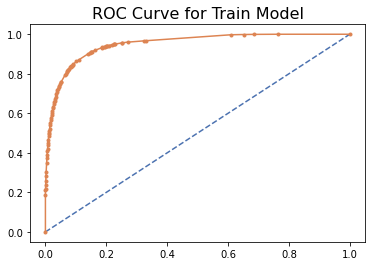

In [123]:
fpr, tpr, thresholds = roc_curve(y_train, probs1)

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC Curve for Train Model', fontsize=16)
plt.show()

In [124]:
print(f'The accuracy score of the CART model (Test) is {round(grid_search1.score(X_test, y_test),5)}')

The accuracy score of the CART model (Test) is 0.90453


In [125]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      1880
         1.0       0.72      0.68      0.70       372

    accuracy                           0.90      2252
   macro avg       0.83      0.81      0.82      2252
weighted avg       0.90      0.90      0.90      2252



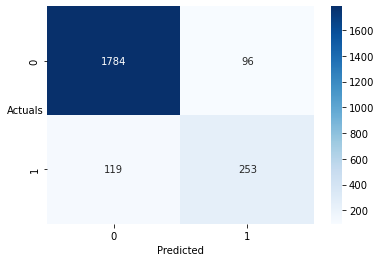

In [126]:
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [127]:
auc2 = roc_auc_score(y_test, probs2)
print(f'The roc-auc score for the CART Model (Test) is {round(auc2,5)}')

The roc-auc score for the CART Model (Test) is 0.92945


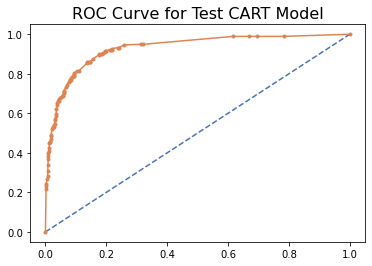

In [128]:
fpr, tpr, thresholds = roc_curve(y_test, probs2)

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC Curve for Test CART Model', fontsize=16)
plt.show()

## Random Forest Model

In [158]:
param_grid2 = {
    'max_depth': [9],
    'min_samples_leaf': [10],
    'min_samples_split': [45],
    'max_features':[9],
    'n_estimators':[201,251]
}

n estimators- It is usually the number of trees we want to build. Higher the number of trees, better the performance but slower the code. 

As from the above decision tree model, we found the best parameters. Let's choose the hyper parameter for n estimators at random and find the best value.

In [159]:
rfcl = RandomForestClassifier()
grid_search2 = GridSearchCV(estimator=rfcl, param_grid=param_grid2, cv=3)

In [160]:
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9], 'max_features': [9],
                         'min_samples_leaf': [10], 'min_samples_split': [45],
                         'n_estimators': [201, 251]})

In [161]:
grid_search2.best_params_

{'max_depth': 9,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 45,
 'n_estimators': 201}

In [162]:
best_grid2 = grid_search2.best_estimator_

In [163]:
ytrain_predict2 = best_grid2.predict(X_train)
ytest_predict2 = best_grid2.predict(X_test)

In [164]:
print(f'The accuracy score of the Random Forest Model (Train) is {round(grid_search2.score(X_train, y_train),5)}')

The accuracy score of the Random Forest Model (Train) is 0.93117


In [165]:
print(classification_report(y_train, ytrain_predict2))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      7484
         1.0       0.88      0.68      0.77      1524

    accuracy                           0.93      9008
   macro avg       0.91      0.83      0.87      9008
weighted avg       0.93      0.93      0.93      9008



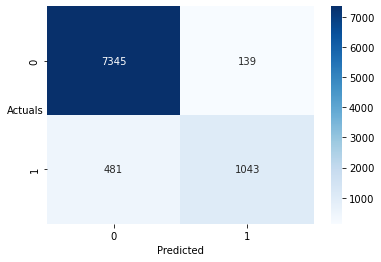

In [166]:
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict2)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [167]:
ytrain_predict3 = best_grid2.predict_proba(X_train)
ytest_predict3 = best_grid2.predict_proba(X_test)

probs3 = ytrain_predict3[:,1]
probs4 = ytest_predict3[:,1]

In [168]:
auc3 = roc_auc_score(y_train, probs3)
print(f'The roc-auc score for the Random Forest Model (Train) is {round(auc3,5)}')

The roc-auc score for the Random Forest Model (Train) is 0.973


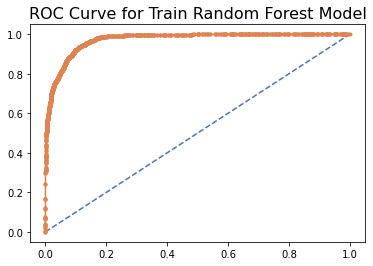

In [169]:
fpr, tpr, thresholds = roc_curve(y_train, probs3)

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC Curve for Train Random Forest Model', fontsize=16)
plt.show()

In [170]:
print(f'The accuarcy score of the Random Forest Model (Test) is {round(grid_search2.score(X_test, y_test),5)}')

The accuarcy score of the Random Forest Model (Test) is 0.92096


In [171]:
print(classification_report(y_test, ytest_predict2))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1880
         1.0       0.84      0.64      0.73       372

    accuracy                           0.92      2252
   macro avg       0.89      0.81      0.84      2252
weighted avg       0.92      0.92      0.92      2252



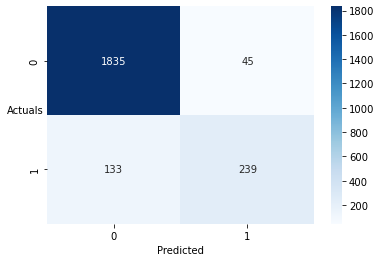

In [172]:
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict2)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [173]:
auc4 = roc_auc_score(y_test, probs4)
print(f'The roc-auc score for the Random Forest Model (Test) is {round(auc4,5)}')

The roc-auc score for the Random Forest Model (Test) is 0.95759


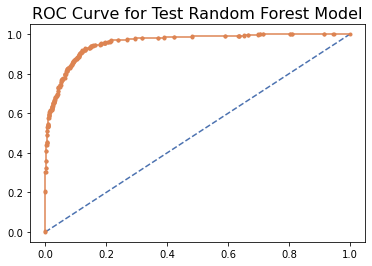

In [174]:
fpr, tpr, thresholds = roc_curve(y_test, probs4)

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC Curve for Test Random Forest Model', fontsize=16)
plt.show()

## ANN Model

In [175]:
from sklearn.neural_network import MLPClassifier
# MLP - Multi Layered Perceptron

In [176]:
param_grid3 = {
    'hidden_layer_sizes': [100, 150],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.001],
    'max_iter': [10000]
}

Hidden layer sizes are chosen on the basis of getting a better model. Sizes are allowed to be chosen as either 200 or 300.

Both the activation formulas are chosen i.e. logistic and relu (Rectified Linear Units)

For solver sgd (Stochastic Gradient Descent) and adam methods are chosen to get an optimal model.

Higher the tolerance value of the model, the faster the speed of the model but lower the accuracy. Lower the tolerance value of the model, higher the accuracy but slower the speed of the model. Hence, for this problem tolerance value is 0.001

For the model to reach optimal point has to run multiple iterations. So, the selected number of iterations is 10000.

In [177]:
MLP = MLPClassifier()
grid_search3 = GridSearchCV(estimator=MLP, param_grid=param_grid3, cv=3)

In [178]:
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [100, 150], 'max_iter': [10000],
                         'solver': ['sgd', 'adam'], 'tol': [0.001]})

In [179]:
grid_search3.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 100,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.001}

In [180]:
best_grid3 = grid_search3.best_estimator_

In [181]:
ytrain_predict4 = best_grid3.predict(X_train)
ytest_predict4 = best_grid3.predict(X_test)

In [182]:
print(f'The accuracy score of the ANN Model (Train) is {round(grid_search3.score(X_train, y_train),5)}')

The accuracy score of the ANN Model (Train) is 0.92451


In [183]:
print(classification_report(y_train, ytrain_predict4))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      7484
         1.0       0.75      0.82      0.79      1524

    accuracy                           0.92      9008
   macro avg       0.86      0.88      0.87      9008
weighted avg       0.93      0.92      0.93      9008



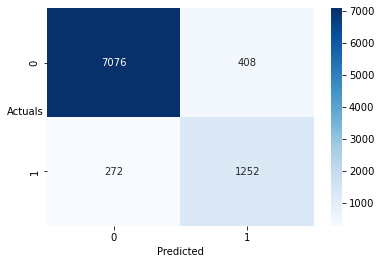

In [184]:
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict4)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [185]:
ytrain_predict5 = best_grid3.predict_proba(X_train)
ytest_predict5 = best_grid3.predict_proba(X_test)

probs5 = ytrain_predict5[:,1]
probs6 = ytest_predict5[:,1]

In [186]:
auc5 = roc_auc_score(y_train, probs5)
print(f'The roc-auc score for the ANN Model (Train) is {round(auc5,5)}')

The roc-auc score for the ANN Model (Train) is 0.96269


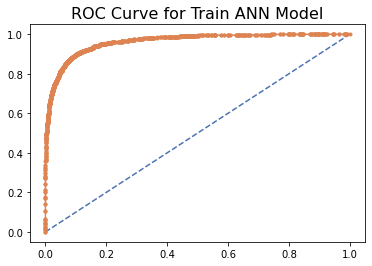

In [187]:
fpr, tpr, thresholds = roc_curve(y_train, probs5)

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC Curve for Train ANN Model', fontsize=16)
plt.show()

In [188]:
print(f'The accuracy score of the ANN Model (Test) is {round(grid_search3.score(X_test, y_test),5)}')

The accuracy score of the ANN Model (Test) is 0.92318


In [189]:
print(classification_report(y_test, ytest_predict4))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1880
         1.0       0.75      0.81      0.78       372

    accuracy                           0.92      2252
   macro avg       0.85      0.88      0.87      2252
weighted avg       0.93      0.92      0.92      2252



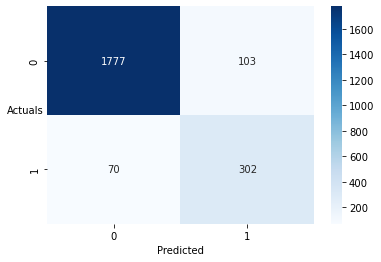

In [190]:
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict4)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [191]:
auc6 = roc_auc_score(y_test, probs6)
print(f'The roc-auc score for the ANN Model (Test) is {round(auc6,5)}')

The roc-auc score for the ANN Model (Test) is 0.94878


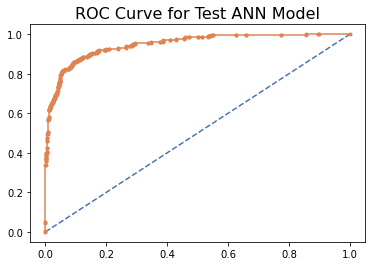

In [192]:
fpr, tpr, thresholds = roc_curve(y_test, probs6)

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC Curve for Test ANN Model', fontsize=16)
plt.show()

## Backward Elimination Feature

In [193]:
import statsmodels.formula.api as SM

Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.

In [194]:
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [195]:
Default_train["Churn"].value_counts(normalize=True)

0.0    0.830817
1.0    0.169183
Name: Churn, dtype: float64

In [196]:
Default_train.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device', 'Churn'],
      dtype='object')

In [197]:
#Creating our first model using all variables
model_1 = SM.logit(formula = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY + Payment + Gender + Service_Score + Account_user_count + account_segment + CC_Agent_Score + Marital_Status + rev_per_month + Complain_ly + rev_growth_yoy + coupon_used_for_payment + Day_Since_CC_connect + cashback + Login_device', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.305034
         Iterations 8


In [198]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9008
Model:                          Logit   Df Residuals:                     8990
Method:                           MLE   Df Model:                           17
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3290
Time:                        23:24:48   Log-Likelihood:                -2747.7
converged:                       True   LL-Null:                       -4094.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.0562      0.317     -9.642      0.000      -3.677      -2.435
Tenure                     -0.1792      0.007    -24.484      0.000      -0.194      -0.165
City_Tier                   0.3546      0.039      9.125      0.000       0.278       0.431
CC_Contacted_LY             0.0226      0.004      5.598      0.000       0.015       0.031
Payment                    -0.0662      0.034     -1.929      0.054      -0.133       0.001
Gender                      0.2759      0.071      3.866      0.000       0.136       0.416
Service_Score              -0.0904      0.053     -1.697      0.090      -0.195       0.014
Account_user_count          0.3615      0.038      9.514      0.000       0.287       0.436
account_segment            -0.3948      0.037    -10.621      0.000      -0.468      -0.322
CC_Agent_Score              0.2888      0.026     11.278      0.000       0.239       0.339
Marital_Status              0.5517      0.053     10.354      0.000       0.447       0.656
rev_per_month               0.1363      0.012     11.307      0.000       0.113       0.160
Complain_ly                 1.6814      0.073     23.058      0.000       1.538       1.824
rev_growth_yoy             -0.0237      0.009     -2.501      0.012      -0.042      -0.005
coupon_used_for_payment     0.1854      0.037      4.992      0.000       0.113       0.258
Day_Since_CC_connect       -0.0914      0.013     -7.130      0.000      -0.117      -0.066
cashback                   -0.0052      0.001     -4.197      0.000      -0.008      -0.003
Login_device               -0.4205      0.075     -5.606      0.000      -0.567      -0.273
===========================================================================================
"""

In [199]:
# Removing Service_score in the next model as it has a probability value greater than 0.05

model_2 = SM.logit(formula = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY + Payment + Gender + Account_user_count + account_segment + CC_Agent_Score + Marital_Status + rev_per_month + Complain_ly + rev_growth_yoy + coupon_used_for_payment + Day_Since_CC_connect + cashback + Login_device', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.305194
         Iterations 8


In [200]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9008
Model:                          Logit   Df Residuals:                     8991
Method:                           MLE   Df Model:                           16
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3286
Time:                        23:24:52   Log-Likelihood:                -2749.2
converged:                       True   LL-Null:                       -4094.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.1595      0.311    -10.146      0.000      -3.770      -2.549
Tenure                     -0.1788      0.007    -24.438      0.000      -0.193      -0.164
City_Tier                   0.3568      0.039      9.192      0.000       0.281       0.433
CC_Contacted_LY             0.0225      0.004      5.568      0.000       0.015       0.030
Payment                    -0.0656      0.034     -1.913      0.056      -0.133       0.002
Gender                      0.2778      0.071      3.894      0.000       0.138       0.418
Account_user_count          0.3440      0.036      9.430      0.000       0.272       0.415
account_segment            -0.3985      0.037    -10.720      0.000      -0.471      -0.326
CC_Agent_Score              0.2860      0.026     11.198      0.000       0.236       0.336
Marital_Status              0.5550      0.053     10.421      0.000       0.451       0.659
rev_per_month               0.1347      0.012     11.217      0.000       0.111       0.158
Complain_ly                 1.6804      0.073     23.052      0.000       1.538       1.823
rev_growth_yoy             -0.0246      0.009     -2.602      0.009      -0.043      -0.006
coupon_used_for_payment     0.1740      0.037      4.754      0.000       0.102       0.246
Day_Since_CC_connect       -0.0912      0.013     -7.108      0.000      -0.116      -0.066
cashback                   -0.0055      0.001     -4.456      0.000      -0.008      -0.003
Login_device               -0.4196      0.075     -5.596      0.000      -0.567      -0.273
===========================================================================================
"""

In [201]:
# Removing payment in the next model as it has a probability value greater than 0.05

model_3 = SM.logit(formula = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY  + Gender + Account_user_count + account_segment + CC_Agent_Score + Marital_Status + rev_per_month + Complain_ly + rev_growth_yoy + coupon_used_for_payment + Day_Since_CC_connect + cashback + Login_device', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.305397
         Iterations 8


In [202]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 9008
Model:                          Logit   Df Residuals:                     8992
Method:                           MLE   Df Model:                           15
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3282
Time:                        23:25:38   Log-Likelihood:                -2751.0
converged:                       True   LL-Null:                       -4094.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.2250      0.310    -10.416      0.000      -3.832      -2.618
Tenure                     -0.1790      0.007    -24.450      0.000      -0.193      -0.165
City_Tier                   0.3397      0.038      9.001      0.000       0.266       0.414
CC_Contacted_LY             0.0223      0.004      5.514      0.000       0.014       0.030
Gender                      0.2769      0.071      3.881      0.000       0.137       0.417
Account_user_count          0.3421      0.036      9.397      0.000       0.271       0.413
account_segment            -0.4000      0.037    -10.766      0.000      -0.473      -0.327
CC_Agent_Score              0.2856      0.026     11.195      0.000       0.236       0.336
Marital_Status              0.5569      0.053     10.456      0.000       0.452       0.661
rev_per_month               0.1352      0.012     11.270      0.000       0.112       0.159
Complain_ly                 1.6732      0.073     22.997      0.000       1.531       1.816
rev_growth_yoy             -0.0244      0.009     -2.575      0.010      -0.043      -0.006
coupon_used_for_payment     0.1752      0.037      4.787      0.000       0.103       0.247
Day_Since_CC_connect       -0.0910      0.013     -7.099      0.000      -0.116      -0.066
cashback                   -0.0056      0.001     -4.521      0.000      -0.008      -0.003
Login_device               -0.4170      0.075     -5.567      0.000      -0.564      -0.270
===========================================================================================
"""

In [203]:
y_prob_pred_train = model_3.predict(Default_train)

In [204]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

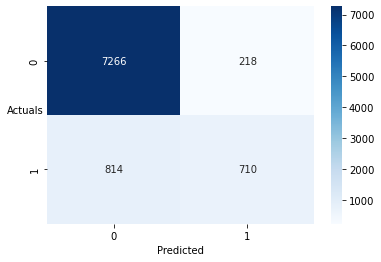

In [205]:
sns.heatmap((metrics.confusion_matrix(Default_train['Churn'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [206]:
print(metrics.classification_report(Default_train['Churn'],y_class_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      7484
         1.0       0.77      0.47      0.58      1524

    accuracy                           0.89      9008
   macro avg       0.83      0.72      0.76      9008
weighted avg       0.88      0.89      0.87      9008



In [207]:
y_prob_pred_test = model_3.predict(Default_test)

In [208]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

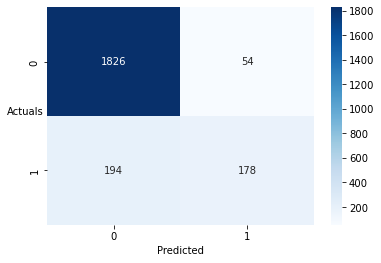

In [209]:
sns.heatmap((metrics.confusion_matrix(Default_test['Churn'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [210]:
print(metrics.classification_report(Default_test['Churn'],y_class_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      1880
         1.0       0.77      0.48      0.59       372

    accuracy                           0.89      2252
   macro avg       0.84      0.72      0.76      2252
weighted avg       0.88      0.89      0.88      2252



Above model is an under fitting model. It has a recall score of 0.48 in the test data which is greater than the recall score (= 0.47) of train data which shows that the model is under fitting.

## SMOTE using Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE 

In [50]:
LogR = LogisticRegression(max_iter=10000)

In [51]:
selector = RFE(estimator = LogR, n_features_to_select = 10)

In [52]:
selector = selector.fit(X_train, y_train)

In [53]:
selector.n_features_

10

In [54]:
selector.ranking_

array([1, 1, 7, 5, 1, 2, 1, 1, 1, 1, 1, 1, 6, 3, 4, 8, 1])

In [55]:
sm = SMOTE(random_state=33, sampling_strategy = .75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [56]:
selector_smote = selector.fit(X_res, y_res)

In [57]:
selector_smote.n_features_

10

In [58]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [59]:
prob_train_smote = selector_smote.predict_proba(X_res)

In [60]:
prob_test_smote = selector_smote.predict_proba(X_test)

In [61]:
probs7 = prob_train_smote[:,1]
probs8 = prob_test_smote[:,1]

In [62]:
print(f'The accuracy score of the SMOTE Model (Train) is {round(selector_smote.score(X_res, y_res),5)}')

The accuracy score of the SMOTE Model (Train) is 0.81171


In [63]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      7484
         1.0       0.78      0.78      0.78      5613

    accuracy                           0.81     13097
   macro avg       0.81      0.81      0.81     13097
weighted avg       0.81      0.81      0.81     13097



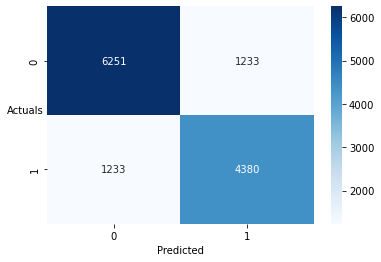

In [66]:
sns.heatmap((metrics.confusion_matrix(y_res, pred_train_smote)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [67]:
auc7 = roc_auc_score(y_res, probs7)
print(f'The roc-auc score for the SMOTE Model (Train) is {round(auc7,5)}')

The roc-auc score for the SMOTE Model (Train) is 0.87343


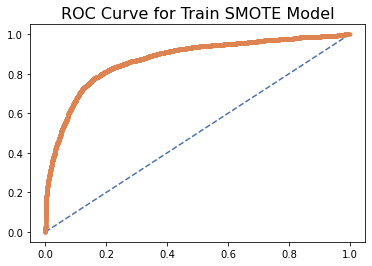

In [68]:
fpr, tpr, thresholds = roc_curve(y_res, probs7)

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC Curve for Train SMOTE Model', fontsize=16)
plt.show()

In [69]:
print(f'The accuracy score of the SMOTE Model (Test) is {round(selector_smote.score(X_test, y_test),5)}')

The accuracy score of the SMOTE Model (Test) is 0.81883


In [70]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88      1880
         1.0       0.47      0.77      0.58       372

    accuracy                           0.82      2252
   macro avg       0.71      0.80      0.73      2252
weighted avg       0.87      0.82      0.83      2252



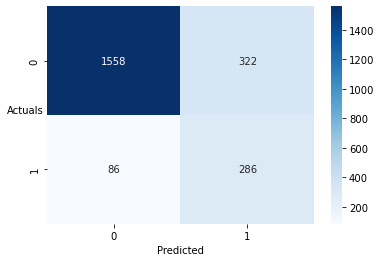

In [71]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_test_smote)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [72]:
auc8 = roc_auc_score(y_test, probs8)
print(f'The roc-auc score for the SMOTE Model (Train) is {round(auc8,5)}')

The roc-auc score for the SMOTE Model (Train) is 0.86413


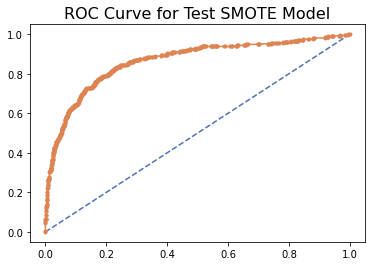

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, probs8)

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC Curve for Test SMOTE Model', fontsize=16)
plt.show()

In [7]:
train_accuracy = {'CART':0.9191, 'RF':0.9312, 'ANN':0.9245, 'Logit':0.8900, 'SMOTE':0.8117}
test_accuracy = {'CART':0.9045, 'RF':0.9210, 'ANN':0.9232, 'Logit':0.8900, 'SMOTE':0.8188}

train_recall = {'CART':0.72, 'RF':0.68, 'ANN':0.82, 'Logit':0.47, 'SMOTE':0.78}
test_recall = {'CART':0.68, 'RF':0.64, 'ANN':0.81, 'Logit':0.48, 'SMOTE':0.77}

train_F1 = {'CART':0.75, 'RF':0.77, 'ANN':0.79, 'Logit':0.58, 'SMOTE':0.78}
test_F1 = {'CART':0.70, 'RF':0.73, 'ANN':0.78, 'Logit':0.59, 'SMOTE':0.58}

train_roc_score = {'CART':0.9501, 'RF':0.973, 'ANN':0.9627, 'SMOTE':0.8734}
test_roc_score = {'CART':0.9295, 'RF':0.9576, 'ANN':0.9488, 'SMOTE':0.7413}

train_precision = {'CART':0.79, 'RF':0.88, 'ANN':0.75, 'Logit':0.77, 'SMOTE':0.78}
test_precision = {'CART':0.72, 'RF':0.84, 'ANN':0.75, 'Logit':0.77, 'SMOTE':0.47}

In [8]:
comparison_table = pd.DataFrame({'Accuracy(Train)':train_accuracy, 'Accuracy(Test)':test_accuracy,
                                 'Recall(Train)':train_recall, 'Recall(Test)':test_recall,
                                 'F1 score(Train)':train_F1, 'F1 score(Test)':test_F1,
                                 'Precision(Train)':train_precision, 'Precision(Test)':test_precision,
                                 'roc-auc score(Train)':train_roc_score, 'roc-auc score(Test)':test_roc_score})

In [9]:
comparison_table.T

,CART,RF,ANN,Logit,SMOTE
Accuracy(Train),0.9191,0.9312,0.9245,0.89,0.8117
Accuracy(Test),0.9045,0.9210,0.9232,0.89,0.8188
Recall(Train),0.7200,0.6800,0.8200,0.47,0.7800
Recall(Test),0.6800,0.6400,0.8100,0.48,0.7700
F1 score(Train),0.7500,0.7700,0.7900,0.58,0.7800
F1 score(Test),0.7000,0.7300,0.7800,0.59,0.5800
Precision(Train),0.7900,0.8800,0.7500,0.77,0.7800
Precision(Test),0.7200,0.8400,0.7500,0.77,0.4700
roc-auc score(Train),0.9501,0.9730,0.9627,NaN,0.8734
roc-auc score(Test),0.9295,0.9576,0.9488,NaN,0.7413
